In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
df= pd.read_csv("../LoanIsight/Data/Loan Prediction Dataset.csv")

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Objective**: Predict the output variable **Loan_Status**
- **Input Features**: Contain both **categorical** and **numerical** variables



In [44]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### We can observe 13 attributes. Out of which 4 attributes are in float, 1 attribute is in integer and the other 8 are in objects.
#### We can change the object into corresponding data to reduce the usage memory.
#### However, we have 62 KB of memory usage, therefore we don't have to change any of the data types.

# Data Preprocessing 
## Preprocessing the Loan Sanction Data

In [51]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### We have found 6 columns having NULL values.

### Now, we have to replace the NULL values with some common values.

### Filling in the missing values for numerical terms using mean.



In [56]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

### All the missing values will be filled with the mean of the current column

### Let us now fill in the missing values for categorical terms using mode operation.

In [57]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

### All the missing values will be filled with the most frequently occurring values.

### Modes give the result in their terms of the data frame, so we only need the values. We will specify 0th index to display the values.

### Now Checking the null values again 

In [58]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### All the NULL values are now replaced.

# Exploratory Data Analysis

## Let us first explore the categorical column "Gender".



<AxesSubplot:xlabel='Gender', ylabel='count'>

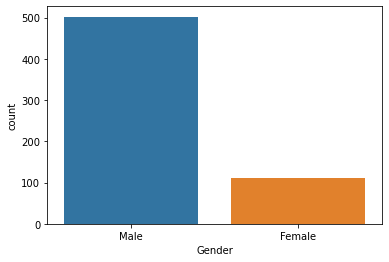

In [59]:
# categorical attributes visualization
sns.countplot(df['Gender'])

### The majority of the applicant is male and a handful is female.

### From these analyses, we will get an intuition that will be useful in building the model.

<AxesSubplot:xlabel='Married', ylabel='count'>

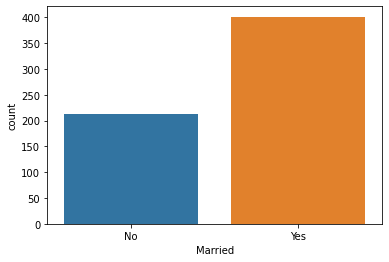

In [60]:
sns.countplot(df['Married'])

### The majority of the applicants are married.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

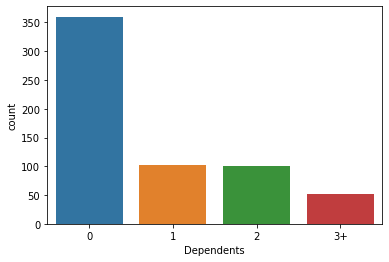

In [61]:
sns.countplot(df['Dependents'])

### The majority of the applicants have zero dependents, around 100 applicants have one or two dependents and only a few have more than three dependents.

<AxesSubplot:xlabel='Education', ylabel='count'>

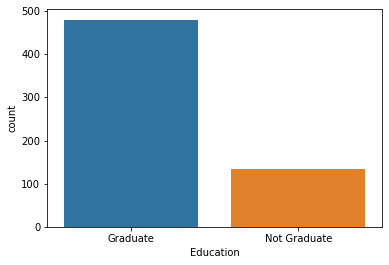

In [62]:
sns.countplot(df['Education'])

### Majority Aplicants are Graduate 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

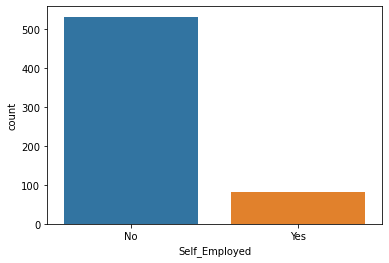

In [63]:
sns.countplot(df['Self_Employed'])

### Around 510 are Working and 90 applicants are either freelancers or run a business.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

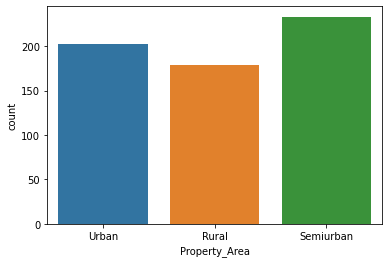

In [64]:
sns.countplot(df['Property_Area'])

### We can assume that the applicants are equally distributed in urban, rural and semi-urban areas.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

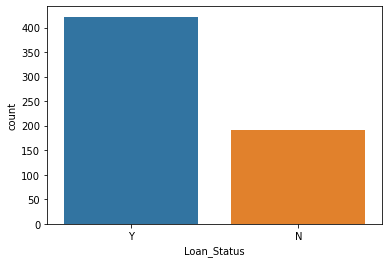

In [66]:
sns.countplot(df['Loan_Status'])


### Around 400 loans are accepted and 200 loans are rejected. Its shows the 2:1 ratio.



In [86]:
pip install --upgrade scipy

  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

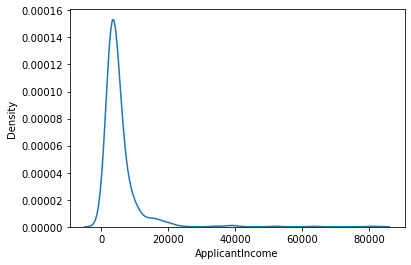

In [90]:
# numerical attributes visualization
sns.kdeplot(df["ApplicantIncome"])

### The data are skewed left in the graph, which is not a suitable distribution to train a Model.

### Hence, we will apply the Log Transformation later to normalize the attributes in the form of Bell Curve (Normal Distribution).

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

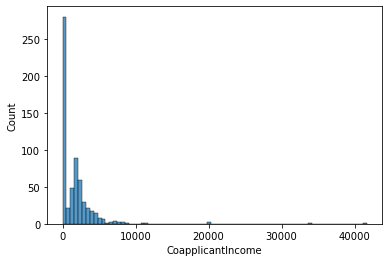

In [93]:
sns.histplot(df["CoapplicantIncome"])


### We have to normalize this graph as well.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

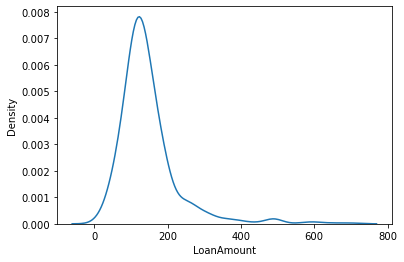

In [94]:
sns.kdeplot(df["LoanAmount"])

## Creation of new attributes

### We can create a new attribute performing Log Transformation. We can also create a new attribute Total Income, that is the sum of Applicant Income and Co-applicant Income.



In [95]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log Transformation

### Log transformation helps to make the highly skewed distribution to less skewed. Instead of changing the column, we will add the data into a new column by writing 'Log' after each column.



<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

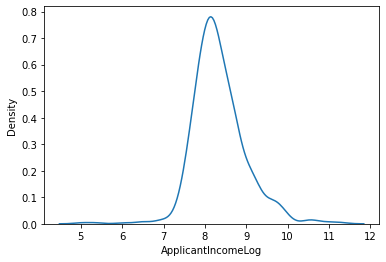

In [100]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.kdeplot(df["ApplicantIncomeLog"])


### We can observe a Normal distribution in a form of a Bell Curve.



<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

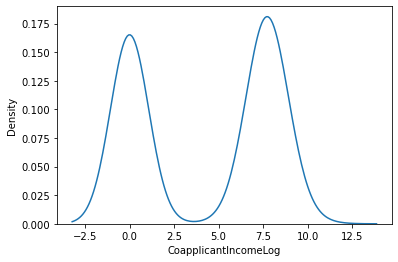

In [102]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.kdeplot(df["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

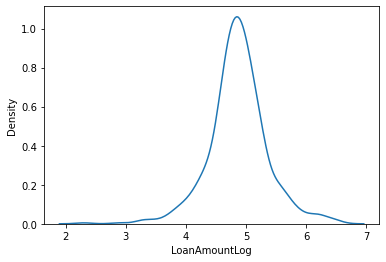

In [103]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.kdeplot(df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

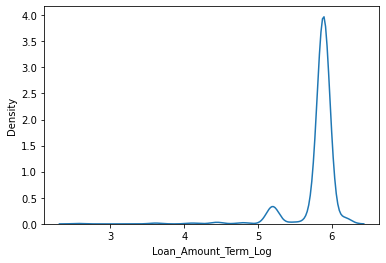

In [105]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.kdeplot(df["Loan_Amount_Term_Log"])

### The Loan amount term is slightly better than before. Despite the fact that it is skewed right.

## Correlation Matrix

### For this project, the correlation matrix will discover the correlation for numerical attributes

<AxesSubplot:>

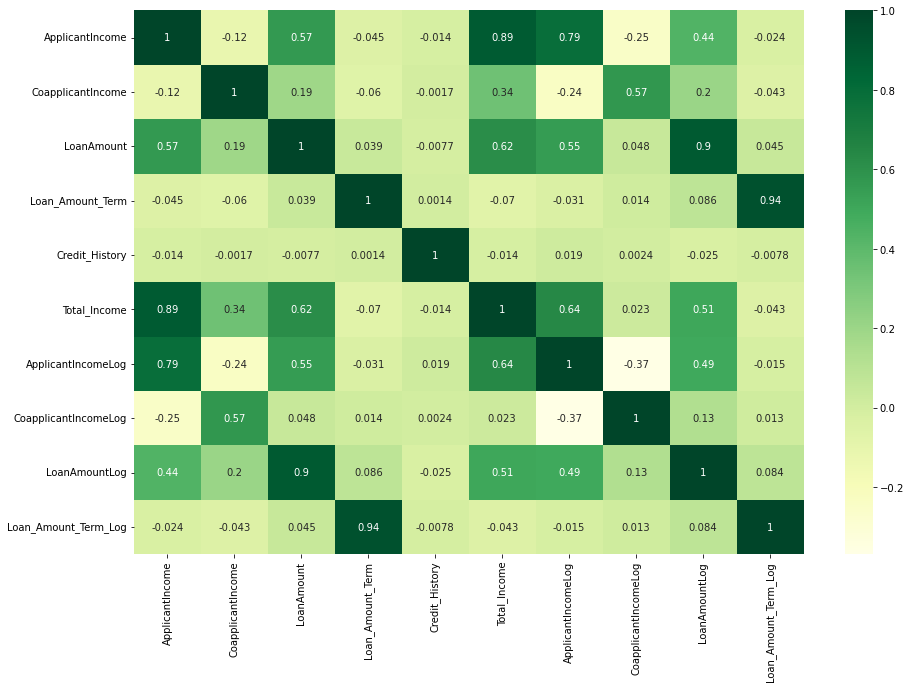

In [109]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="YlGn")


### In this graph, the higher density is plotted with dark color and the lower density is plotted with light color.
### We need to remove the highly correlated attributes. 
### It means the original attributes are correlated with log attributes.
### We will remove the previous attributes and keep the log attributes to train our model.

In [110]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878


### Let us drop some unnecessary columns.



In [111]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878


### Out of all previous columns, we will keep 'Credit History'.

# Label Encoding

### We will use label encoding to convert the categorical column into the numerical column.

In [113]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', "Married", "Education", 'Self_Employed', "Property_Area", "Loan_Status", "Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

### We access each column from the column list. And for the corresponding column, the 'le.fit_transform()' function will convert the values into numerical then store them into the corresponding column.

In [114]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878


### All the values of the dataset are now in numerical format. It will help us to train our model easily.

### For Loan status 1 indicates 'Yes' and 0 indicates 'No'.



# Model Training 

## Splitting the data for Training and Testing
## Before training and testing, we have to specify the input and output attributes.



In [116]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

### Let us now split the data.

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### We will add random_state with the attribute 42 to get same split upon re-running.

### If you don't specify random state, it will randomly split the data upon re-running giving inconsistent results.

In [119]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

### Here, cross-validation will split the data set into multiple parts.

### For example; cv=5 means, it will split the data into 5 parts.

### For each iteration, the training will use 4 parts and testing will use 1 part.

### You can change the cross-validation with the common term 3 or 5.

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 81.10888977742236


### Since cross-validation deals with multiple parts, we have to focus on cross-validation percentage, which is an overall accuracy of the model.

In [122]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 74.67532467532467
Cross validation is 71.6620018659203


### Poor Results

In [123]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 78.66586698653872


### better result than Decision Tree

In [125]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 74.02597402597402
Cross validation is 75.08729841396774


### For this project, Extra tree doesn't show better results than random forest.

### Out of all the classifiers, Logistic Regression shows a better result in terms of cross-validation. Now let's try to change some hyperparameters to improve the accuracy. 



# Hyperparameter tuning

## We will change some hyperparameters for Random Forest Classifiers.

In [127]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 80.45715047314405


# Confusion Matrix

## A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

### We will use the Random Forest Model.

In [128]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

### After running the basic default parameters we will plot the confusion matrix.

In [129]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 5, 95]], dtype=int64)

<AxesSubplot:>

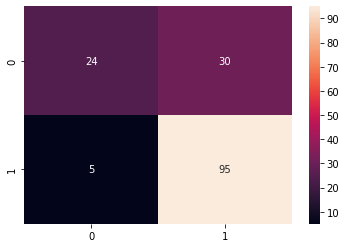

In [131]:
sns.heatmap(cm, annot=True)

## The left side of the heatmap indicates actual values, and the bottom side shows predicted values.

### For actual value '0' there are 24 correct predictions.
### For actual value '1' there are 86 correct predictions.

### The model has falsely predicted 30 counts for class 0.
### Therefore, we need to train better for class 0.

### Similarly, we can compose other additional assumptions from the confusion matrix.

# In this Notebook, we have analyzed the dataset for loan prediction using machine learning.

